## Abril de 2021
## IB0017 Tarea 3 
## Estudiante: Mateo Cerdas Barboza

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Modelos matemáticos a utilizar
#### Maxwell
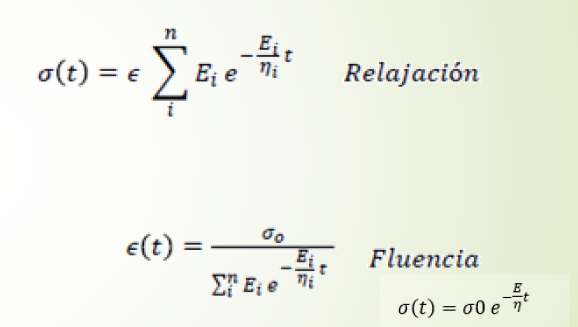

#### Kelvin
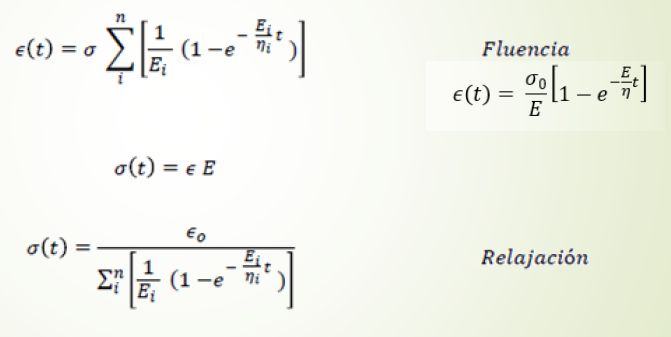

#### Burger
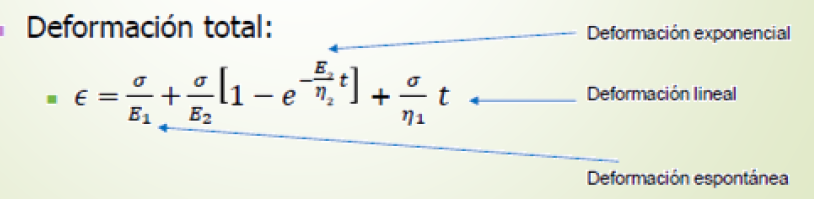

#### Definir función que devuelve  el vector de las sumas  del modelo de maxwell

In [2]:
def maxwell_sum_t(E_series, Tau_series, time):
    zi=zip(E_series, Tau_series)
    result=sum([E*np.exp(-(1/Tau)*time) for E,Tau in zi])
    return result

#### Definir función que devuelve  el vector de las sumas  del modelo de Kelvin

In [3]:
def kelvin_sum_t(E_series, Tau_series, time):
    zi=zip(E_series, Tau_series)
    result=sum([(1/E)*(1-np.exp(-(1/Tau)*time)) for E,Tau in zi])
    return result

#### Función que devuelve deformación para un resorte

In [4]:
def spring_def(sigma,E):
    result=sigma/E
    return result

#### Función que devuelve deformación para un rembolo

In [5]:
def piston_def(sigma,visc,t):
    result=sigma*t/visc

### Problemas al final de la presentación 

In [6]:
# Insertando valores dados
# E(GN/m²)
E_series=np.array([3,2.5,2,1.5,1.20,1.1,1])*10**9
#Tau(s)
Tau_series=np.array([10**n for n in range(0,7)])
# σ(N/m2)
sigma_series=np.array([0.5,0.75,1,1.25,1.5])
 #ϵ(%)
epsilon_series=[0.1,0.2,0.3,0.4,0.5]

In [7]:
# Generar el vector de sumas del modelo de Maxwell
time_series=np.array(range(0,600))
sum_series=maxwell_sum_t(E_series, Tau_series,time_series)

#### Modelo de maxwell en Fluencia

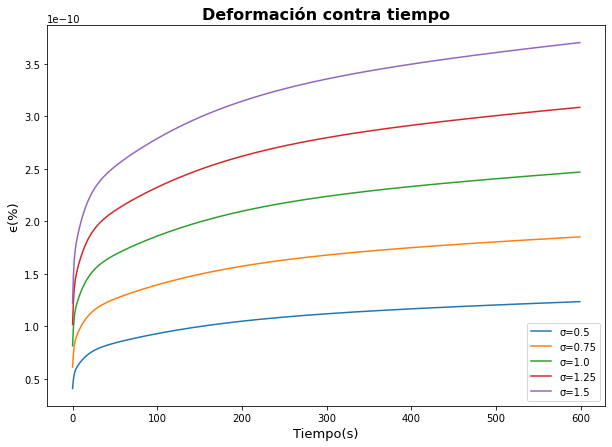

In [8]:
plt.figure(figsize=(10,7))
for sigma in sigma_series:
    y=sigma/sum_series
    label=f"σ={sigma}"
    plt.plot(time_series,y,label=label)
plt.legend(loc='lower right')
plt.title("Deformación contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("ϵ(%)",fontsize=13)
plt.show()

#### Modelo de maxwell en Relajación

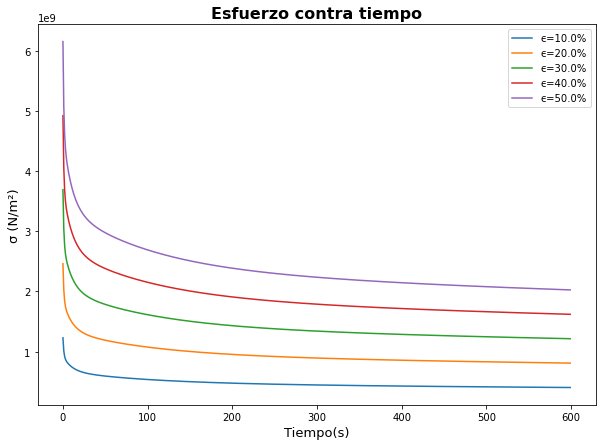

In [9]:
plt.figure(figsize=(10,7))
for epsilon in epsilon_series:
    y=epsilon*sum_series
    label=f"ϵ={epsilon*100}%"
    plt.plot(time_series,y,label=label)
plt.legend(loc='upper right')
plt.title("Esfuerzo contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("σ (N/m²)",fontsize=13)
plt.show() 

### Problemas extra de materiales viscoelásticos.
### 1)
###  Se tienen tres elementos de Kelvin-Voight en serie
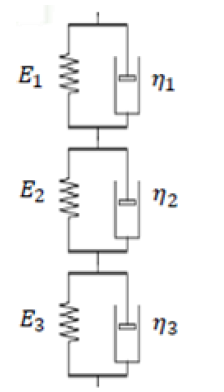

In [10]:
# Definir datos dados
#carga(Pa)
sigma_series=np.array([0.5,0.75,1,1.25,1.5])
#deformación cte(%)
epsilon_series=np.array([0.1,0.3,0.5,0.7,0.9])
#módulo de elasticidad(Pa)
E_series=np.array([6,3,1])*10**9
#n/E= Tau(s)
tau_series=np.array([10**2,10**4,10**6])#hay un valor sobrante

#### Definir función que devuelve el vector de las sumas del modelo de Kelvin-Voight

In [11]:
def kelvin_sum_t(E_series, Tau_series, time):
    zi=zip(E_series, Tau_series)
    result=sum([(1/E)*(1-np.exp(-(1/Tau)*time)) for E,Tau in zi])
    return result

In [12]:
#generar serie de tiempo(s)
time_series=np.array(range(1,60*3))
#obtener vector de sumas del modelo de kelvin con la función generada antes
sum_series=kelvin_sum_t(E_series,tau_series,time_series)

#### Modelo de Kelvin en Fluencia

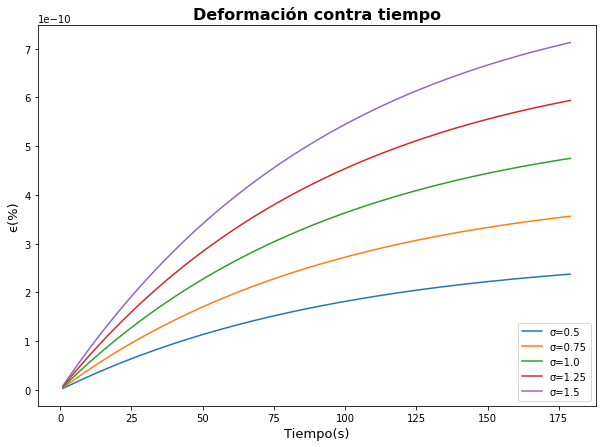

In [13]:
#graficar de fluencia
#definir función que grafica fluencia dada la serie de sumas del modelo y esfuerzos a probar
plt.figure(figsize=(10,7))
for sigma in sigma_series:
    y=sigma*sum_series
    label=f"σ={sigma}"
    plt.plot(time_series,y,label=label)
plt.legend(loc='lower right')
plt.title("Deformación contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("ϵ(%)",fontsize=13)
plt.show()

#### Discusión: Se observa que a mayor σ, mayor creciemetno exponencial en  la curva de deformación vs t

#### Modelo de Kelvin en Relajación

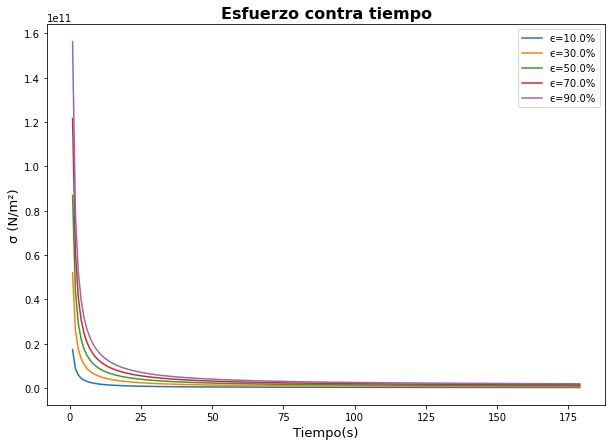

In [14]:
plt.figure(figsize=(10,7))
for epsilon in epsilon_series:
    y=epsilon/sum_series
    label=f"ϵ={epsilon*100}%"
    plt.plot(time_series,y,label=label)
plt.legend(loc='upper right')
plt.title("Esfuerzo contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("σ (N/m²)",fontsize=13)
plt.show() 

#### Discusión: Se observa que el esfuerzo disminuye mas bruscamente para la menor deformación constante

### 2)
### Se tienen 4 elementos que forman un modelo de Burger
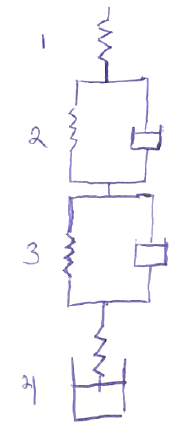
### Los elementos 2 y 3 conforman un solo elemento de Kelvin-Voight, y así será tratado en este procedimiento

In [15]:
#Definir datos dados

time_series=np.array(range(0,600))
#constantes del elemento de  Kelvin-Voight
E_series=np.array([3,2])
tau_series=np.array([120,150])/E_series
#constantes del elemento resorte
spring_E=2
#constantes del elemento piston
visc=100

#### Secuencia 1

In [16]:
#Obtener datos
elem_1=np.array([])
elem_23=np.array([])
elem_4=np.array([])
total=np.array([])
for s in time_series:
    if 20>=s>=0:
        sigma=0
    if 150>=s>21:
        sigma=100
    if 300>=s>151:
        sigma=200
    if 450>=s>=301:
        sigma=100
    if 600>=s>=451:
        sigma=0     
    elem_1=np.append(elem_1,sigma/spring_E)
    elem_23=np.append(elem_23,sigma*kelvin_sum_t(E_series,tau_series,s))
    elem_4=np.append(elem_4,sigma*s/visc)
    total=np.append(total,elem_1[-1]+elem_23[-1]+elem_4[-1])

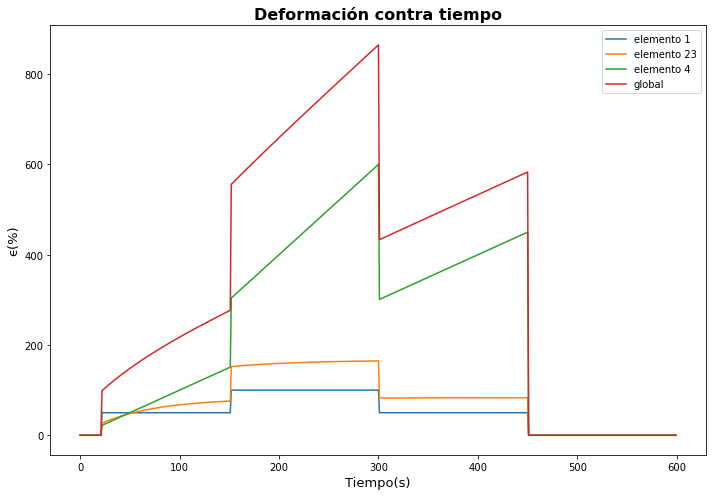

In [17]:
#Graficar 
plt.figure(figsize=(10,7))
plt.plot(time_series,elem_1,label="elemento 1")
plt.plot(time_series,elem_23,label="elemento 23")
plt.plot(time_series,elem_4,label="elemento 4")
plt.plot(time_series,total,label="global")

plt.legend(loc='upper right')
plt.title("Deformación contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("ϵ(%)",fontsize=13)
plt.tight_layout()
plt.show()

#### Secuencia 2

In [18]:
#Obtener datos
elem_1=np.array([])
elem_23=np.array([])
elem_4=np.array([])
total=np.array([])
for s in time_series:
    if 20>=s>=0:
        sigma=0
    if 150>=s>21:
        sigma=200
    if 300>=s>151:
        sigma=200
    if 450>=s>=301:
        sigma=200
    if 600>=s>=451:
        sigma=0     
    elem_1=np.append(elem_1,sigma/spring_E)
    elem_23=np.append(elem_23,sigma*kelvin_sum_t(E_series,tau_series,s))
    elem_4=np.append(elem_4,sigma*s/visc)
    total=np.append(total,elem_1[-1]+elem_23[-1]+elem_4[-1])

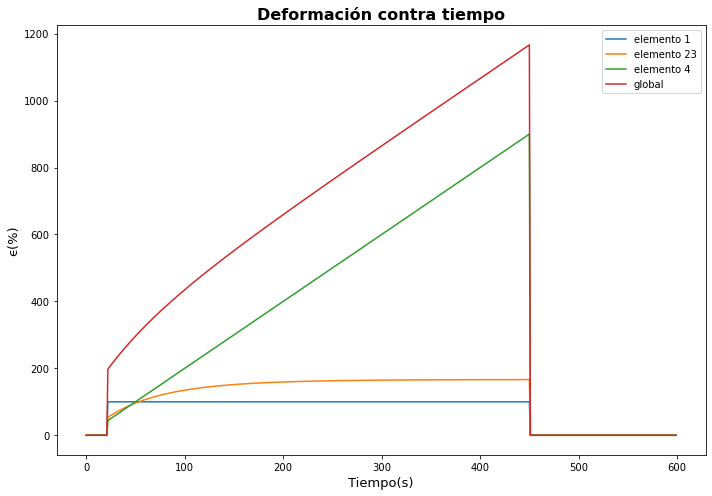

In [19]:
#Graficar 
plt.figure(figsize=(10,7))
plt.plot(time_series,elem_1,label="elemento 1")
plt.plot(time_series,elem_23,label="elemento 23")
plt.plot(time_series,elem_4,label="elemento 4")
plt.plot(time_series,total,label="global")

plt.legend(loc='upper right')
plt.title("Deformación contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("ϵ(%)",fontsize=13)
plt.tight_layout()
plt.show()

#### Discusión de resultados
#### Se observa que para cada elemento se tiene una curva de deformación contra tiempo diferente, cada una descrita por los modelos correspondientes, en el caso del elemento kelvin-voight el incremento en la deformación es exponencial y se estabiliza en una valor, para el resorte la deformación permanece constante y es directamente proporsional al esfuerzo, para el piston la curva creciente y lineal. 
#### Por otro lado, para los esfuerzos de 0 al final de las gráficas se tiene un comportaimento de la curva que no modela bien lo que sucede  en la recuperación, ya que la deformación de todas las curvas diminuye como si se tratara de un resorte, y este no es el caso.